In [1]:
import pywt
import pywt.data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import librosa, librosa.display
from scipy import signal
import scipy 
import os
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import lag_plot
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from matplotlib import cm
import os


In [2]:
def get_data(i_state, i_serie):
    folder = 'state#'+str(i_state)
    listfile= os.listdir(folder)
    filename = listfile[i_serie]
    sep =  os.path.sep
    getfile = folder + sep + filename
    a = pd.read_csv(getfile, delimiter=r'\s+', header=None)

    return a

In [15]:
x = get_data(i_state=1, i_serie=0)[4]

In [16]:
x = list(x)

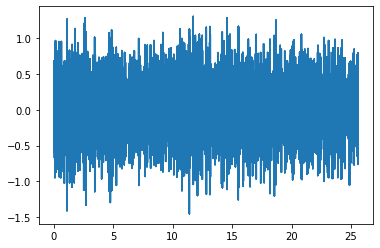

In [11]:
t = list(t)
x = list(x)
t = t+t
x = x+x
plt.plot(t,x)

In [14]:
len(x+x)

32768

In [8]:
# wavelet filter family http://wavelets.pybytes.com/wavelet/coif3/ : Daubechies, Symplets, Coiflets
w = pywt.Wavelet('sym5')
coeffs = pywt.wavedec(x, w, level=6)

In [9]:
def reconstruction_plot(y, **kwargs):
    plt.plot(np.linspace(0, 1, len(y)), y, **kwargs)


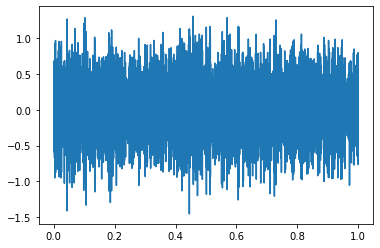

In [17]:
N_component =8
reconstruction_plot(pywt.waverec(coeffs[0:N_component] + [None] * (len(coeffs)- N_component), w))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


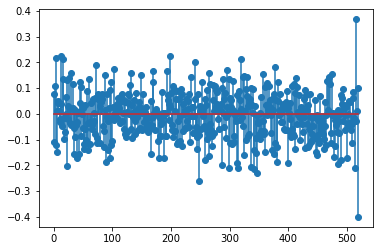

In [22]:
plt.stem(coeffs[3]);

In [23]:
len(coeffs[1])

136

In [24]:
np.shape(coeffs)

(7,)

In [26]:
w = pywt.Wavelet('db5')
coeffs = pywt.wavedec(x, w, level=6)

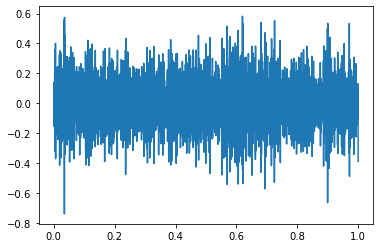

In [28]:
N_component =5
reconstruction_plot(pywt.waverec(coeffs[0:N_component] + [None] * (len(coeffs)- N_component), w))

In [32]:
print(w)

Wavelet db5
  Family name:    Daubechies
  Short name:     db
  Filters length: 10
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [40]:
out = pywt.wavedec(x, w, level=1)

In [41]:
out[0]

array([ 0.56438074,  0.13506093, -0.57166382, ...,  0.88761702,
       -0.81981791, -0.39217073])

In [37]:
help(pywt.wavedec)

Help on function wavedec in module pywt._multilevel:

wavedec(data, wavelet, mode='symmetric', level=None, axis=-1)
    Multilevel 1D Discrete Wavelet Transform of data.
    
    Parameters
    ----------
    data: array_like
        Input data
    wavelet : Wavelet object or name string
        Wavelet to use
    mode : str, optional
        Signal extension mode, see `Modes` (default: 'symmetric')
    level : int, optional
        Decomposition level (must be >= 0). If level is None (default) then it
        will be calculated using the `dwt_max_level` function.
    axis: int, optional
        Axis over which to compute the DWT. If not given, the
        last axis is used.
    
    Returns
    -------
    [cA_n, cD_n, cD_n-1, ..., cD2, cD1] : list
        Ordered list of coefficients arrays
        where `n` denotes the level of decomposition. The first element
        (`cA_n`) of the result is approximation coefficients array and the
        following elements (`cD_n` - `cD_1`) are 

## Empirical Mode Decomposition

In [3]:
from PyEMD import EMD, EEMD
import numpy  as np
import pylab as plt

In [17]:
x = get_data(i_state=1, i_serie=0)[4].to_list()

In [4]:
x = np.array(x)

In [6]:
T=25.6
t = np.linspace(0,T,len(x))

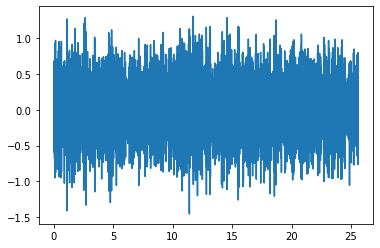

In [22]:
plt.plot(t,x)

In [26]:
# Execute EMD on signal              
emd = EMD()
IMFs = emd.emd(x,t)
N = IMFs.shape[0]+1


In [14]:
t = np.linspace(0, 1, 200)
s = np.cos(11*2*np.pi*t*t) + 6*t*t
emd = EMD()
IMFs = emd.emd(s,t)
N = IMFs.shape[0]+1

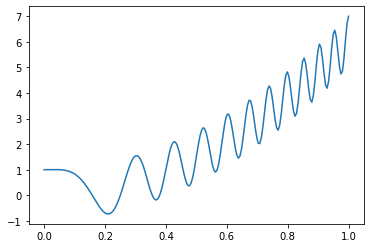

In [15]:
plt.plot(t,s)

In [ ]:
from matplotlib import rcParams, rc
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Time New Roman']
rcParams.update({'font.size': 18})


t = np.linspace(0,120,np.shape(signal)[1])
tit = ['Sensor s1', 'Sensor s2', 'Sensor s3']
plt.figure(figsize=(18,5))
i=1
for j in range(1,4):
  ax = plt.subplot(130+(i-1)*3+j)
  ax.plot(t,signal[10,:,(i-1)*3+j-1],'black')
  ax.set_xlabel('Time (s)')
  ax.set_ylabel('Acceleration (m/s$^2$)')
  ax.set_title(tit[j-1])
  ax.set_xlim(0,120)
  ax.set_ylim(-180,180)
  ax.set_yticks(np.arange(-150, 180, 50)) 
plt.tight_layout()  

In [7]:
x = get_data(i_state=1, i_serie=0)[4].to_list()

In [8]:

T=25.6*9
t = np.linspace(0,T,len(x))

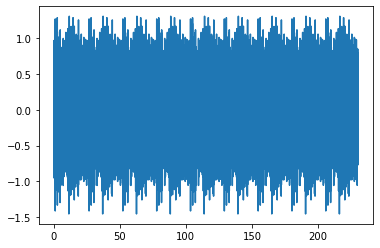

In [20]:
plt.plot(t,x)

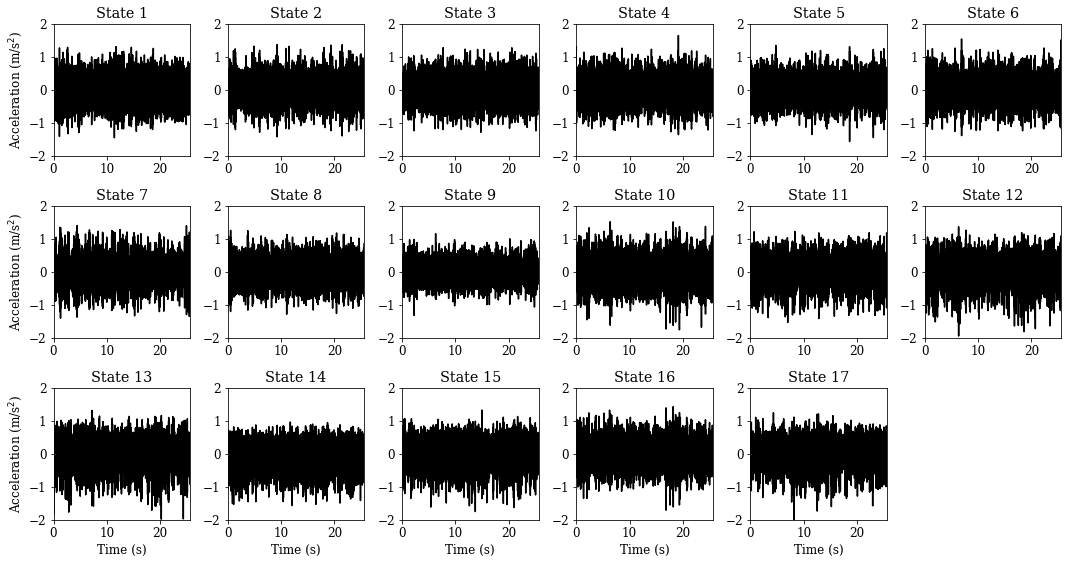

In [38]:
from matplotlib import rcParams, rc
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Time New Roman']
rcParams.update({'font.size': 12})

plt.figure(figsize=(15,8))
for i in range(1,18):
    ax = plt.subplot(3,6,i)
    x = get_data(i_state=i, i_serie=0)[4].to_list()
    t = np.linspace(0,25.6,len(x))
    ax.plot(t,x,'black')
    ax.set_xlim(0,25.6)
    ax.set_ylim(-2.0,2.0)
    ax.set_title('State '+str(i))
    if i > 12:
        ax.set_xlabel('Time (s)')
    if i in [1,7,13]:
        ax.set_ylabel('Acceleration (m/s$^2$)')
    
plt.tight_layout()      

In [11]:
len(x)

8192

In [115]:
x = get_data(i_state=16, i_serie=0)[4].to_list()
y1=np.array(x[700:900])+np.linspace(-0.2,0.5,200)
y2=-y1
y3=1.5*y1
y4= list(y1[50:])+list(y1[:50])

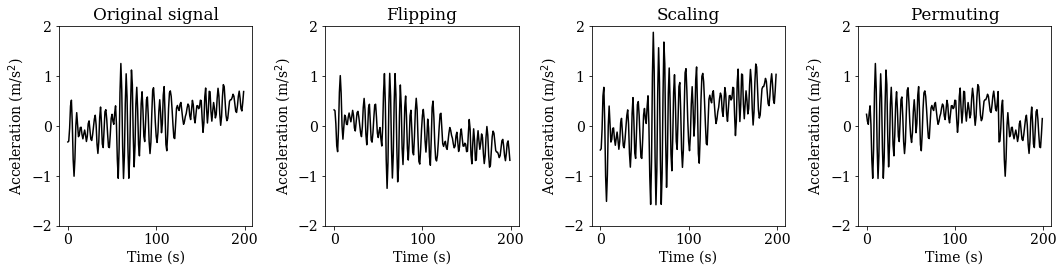

In [130]:
from matplotlib import rcParams, rc
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Time New Roman']
rcParams.update({'font.size': 14})

yy = [y1,y2,y3,y4]
tit=['Original signal', 'Flipping', 'Scaling', 'Permuting']

plt.figure(figsize=(15,4))
for i in range(1,5):
    ax = plt.subplot(1,4,i)    
    ax.plot(yy[i-1],'black')
    ax.set_ylim(-2,2)
    ax.set_title(tit[i-1])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Acceleration (m/s$^2$)')
plt.tight_layout()      


In [39]:
a = np.array([[[0.864753, 0.842249, 0.901274]
, [ 0.744948, 0.937721, 0.878726]
, [ 0.906477, 0.889025, 0.925622]
, [ 0.876867, 0.929055, 0.941169]
, [ 0.845547, 0.906432, 0.901244]]

, [[0.79, 0.824843, 0.887286]
, [ 0.743103, 0.854228, 0.90994, ]
, [ 0.86991, 0.944633, 0.857796]
, [ 0.796897, 0.784648, 0.918576]
, [ 0.915187, 0.939445, 0.939355]]

, [[0.718816, 0.790075, 0.927286]
, [ 0.743418, 0.906507, 0.911544]
, [ 0.755277, 0.883808, 0.878786]
, [ 0.84952, 0.885772, 0.92904, ]
, [ 0.925502, 0.899565, 0.884108]]

, [[0.755277, 0.760825, 0.882084]
, [ 0.748216, 0.781289, 0.915052]
, [ 0.821679, 0.678561, 0.941064]
, [ 0.784948, 0.892474, 0.937601]
, [ 0.837331, 0.882099, 0.941169]]

, [[0.701304, 0.887406, 0.890795]
, [ 0.677016, 0.906567, 0.822924]
, [ 0.731244, 0.814363, 0.9394, ]
, [ 0.903013, 0.807586, 0.848951]
, [ 0.800495, 0.757016, 0.915052]]])

In [40]:
b = np.array([[[0.956807, 0.951634]
, [ 0.937751, 0.923808]
, [ 0.956867, 0.936027]
, [ 0.956852, 0.960345]
, [ 0.951664, 0.944708]]

, [[0.934273, 0.958531]
, [ 0.944708, 0.927331]
, [ 0.94988, 0.944723]
, [ 0.94988, 0.918591]
, [ 0.967196, 0.916867]]

, [[0.932474, 0.939415]
, [ 0.942894, 0.937736]
, [ 0.958546, 0.918666]
, [ 0.948246, 0.944648]
, [ 0.951634, 0.944768]]

, [[0.953283, 0.939415]
, [ 0.878591, 0.925652]
, [ 0.944678, 0.941229]
, [ 0.944693, 0.941214]
, [ 0.963748, 0.854243]]

, [[0.913403, 0.882129]
, [ 0.949835, 0.944678]
, [ 0.958531, 0.92904, ]
, [ 0.963763, 0.937736]
, [ 0.953388, 0.916882]]])


In [41]:
np.shape(a)

(5, 5, 3)

In [42]:
np.shape(b)

(5, 5, 2)

In [43]:
m = np.concatenate((a,b), axis=2)

In [44]:
m.shape

(5, 5, 5)

In [25]:
import pandas as pd

# Get Data: this ex will only use part of it (i.e. rows 750-1500)
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')
start, end = 750, 1500


In [28]:
print(X.shape, Y.shape, Z.shape)


(750,) (750,) (750,)


In [33]:
import plotly.graph_objects as go


X = df['year'][start:end]
Y = df['continent'][start:end]
Z = z=df['pop'][start:end]

fig = go.Figure(data=go.Scatter3d(
    x=X, y=Y, z=Z,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=1500,
        size=df['gdpPercap'][start:end],
        color = df['gdpPercap'][start:end],
        colorbar = dict(title = 'Life<br>Expectancy'),
        line_color='rgb(140, 140, 170)'
    )
))



fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                    height=800, width=800,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )

fig.show()

In [37]:
hidden_dim_list =[10, 20, 30, 40, 50]
conv_layer_list=[10,20,30,40,50]
size_kernel_list = [50,100,150,200,250]

In [61]:
X = []
Y = []
Z = []
M = []

for i, hidden_dim in enumerate(hidden_dim_list):
    for j, conv_layer in enumerate(conv_layer_list):
        for k, size_kernel in enumerate(size_kernel_list):
            X.append(hidden_dim_list[i])
            Y.append(conv_layer_list[j])
            Z.append(size_kernel_list[k])
            M.append(m[i,j,k])
            
M = np.array(M) *100        

In [99]:
fig = go.Figure(data=go.Scatter3d(
    x=X, y=Y, z=Z,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=5,
        size=M,
        color = M,
        colorbar = dict(title = 'Mean Valid Acc.'),
        line_color='rgb(140, 140, 170)'
    )
))


fig.update_layout(scene = dict(
                    xaxis = dict(
                         title='LSTM hidden layer',
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",
                         tickvals= [10,20,30,40,50]),
                    yaxis = dict(
                        title = 'Number of conv. kernel',
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",
                        tickvals= [10,20,30,40,50]),
                    zaxis = dict(
                        title = 'Size of conv. kernel',
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        tickvals= [50,100,150,200,250],
                        zerolinecolor="white",),),
                      font=dict(
                        family="Time New Roman",
                        size=16,
                        ),
                    height=600, width=1000,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )

fig.show()

In [70]:
np.max(M)

96.7196

In [81]:
id = np.where(M==np.max(M))[0][0]
print(X[id], Y[id], Z[id])


20 50 200


In [ ]:
X.append(hidden_dim_list[i])
            Y.append(conv_layer_list[j])
            Z.append(size_kernel_list[k])

In [80]:
id

array([48], dtype=int64)